In [6]:
import matplotlib.pyplot as plt
import torch as nn
import numpy as np
import csv
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [7]:
content = []
with open("CrabAgePrediction.csv") as openfile:
    for line in openfile:
        content.append(line[:-1].split(','))
        
dataset = np.array(content)
print(dataset)

[['Sex' 'Length' 'Diameter' ... 'Viscera Weight' 'Shell Weight' 'Age']
 ['F' '1.4375' '1.175' ... '5.5848515' '6.747181' '9']
 ['M' '0.8875' '0.65' ... '1.37495075' '1.5592225' '6']
 ...
 ['I' '0.625' '0.4625' ... '0.52446575' '0.63786375' '5']
 ['I' '1.0625' '0.775' ... '2.33883375' '2.9766975' '6']
 ['I' '0.7875' '0.6125' ... '1.34660125' '1.417475' '8']]


In [26]:
for i in range(1, len(dataset)):
    if dataset[i][0] == 'F':
        dataset[i][0] = 0.1
    if dataset[i][0] == 'M':
        dataset[i][0] = 1
    if dataset[i][0] == 'I':
        dataset[i][0] = 0.55

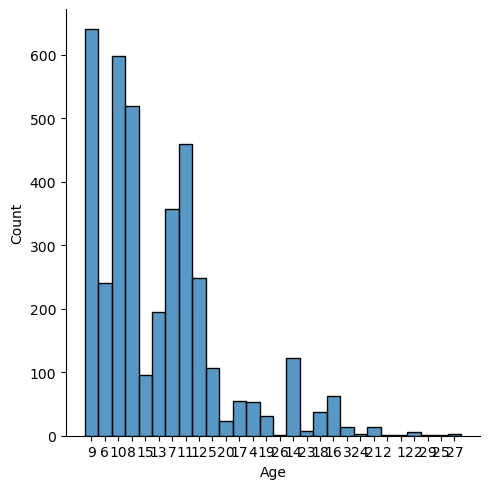

In [27]:
df_crabs = pd.DataFrame(dataset[1:][:-1], columns = dataset[0])

sns.displot(df_crabs[df_crabs.columns[-1]])

In [ ]:
To powinno robić ładną statystykę, ale aktulanie nie działa

TypeError: Image data of dtype object cannot be converted to float

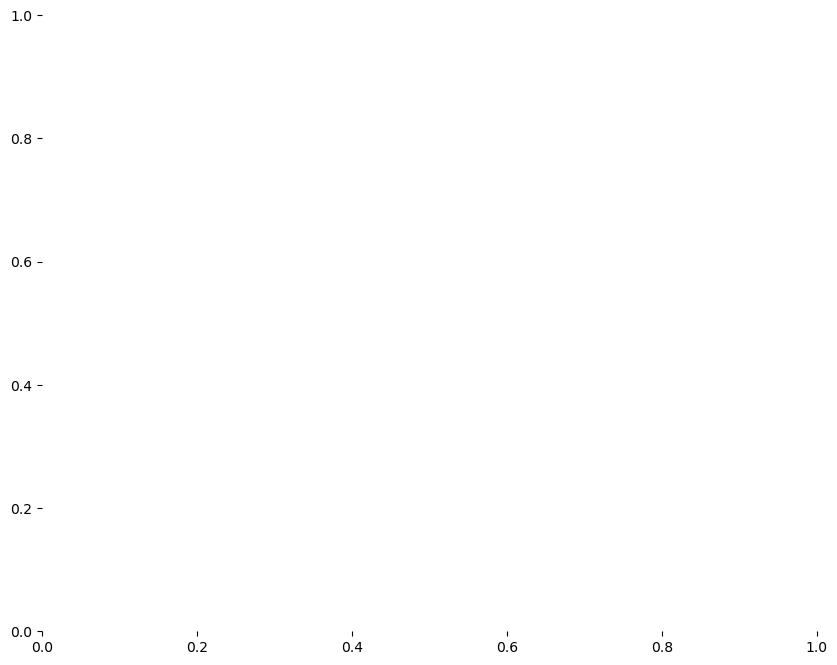

In [28]:
fig, ax = plt.subplots(figsize=(10.,8.))
sns.heatmap(ax = ax, data = df_crabs, annot = True)

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(df_crabs[df_crabs.columns[:-1]], df_crabs["Age"], test_size = 0.6)

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

I cyk matematyka, ale chyba już coś trenuje

In [50]:
linear_model = LinearRegression(n_jobs = -1)
linear_model.fit(X_train_scaled, Y_train)

LinearRegression(n_jobs=-1)

I tu na dole już praktycznie umie okolice tych wartości pokazać

In [51]:
linear_model.predict(X_test_scaled)

array([ 9.95646082,  8.75008515, 11.73983129, ..., 12.27399674,
       16.44920497, 13.33089141])

In [53]:
Y_test_converted = Y_test.astype(float)

In [54]:
def print_statistics(y_true, y_pred):
    rss = np.sum((y_true - y_pred) ** 2)
    ss = np.sum((y_true - y_true.mean()) ** 2)
    print(f"R^2: {1 - rss/ss}")
    print(f"RSS: {rss}")
    print(f"RMSE: {np.sqrt(np.mean((y_true - y_pred) ** 2))}")
    print(f"MAE: {np.mean(abs(y_true - y_pred))}")
    
y_pred = linear_model.predict(X_test_scaled)
print_statistics(Y_test_converted, y_pred)

R^2: 0.5105880224202977
RSS: 11450.448348719383
RMSE: 2.213985778182168
MAE: 1.6310960047540264
